# Decision Tree Classification - Daily Data

### We are going to use Decision Tree Classification to predict the moon phase

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from datetime import datetime, date, time
from sklearn.preprocessing import LabelEncoder

#### Now we are going to import our data and convert it required form

In [30]:
#data Import
location = "kolkata"

filename_t2 = "WD_{0}_{1}.csv"
filed = filename_t2.format(location, "D")

def apply_dt(string):
    return datetime.strptime(string, '%Y-%m-%d')

df = pd.read_csv(filed, parse_dates=['date'], index_col='date', date_parser=apply_dt)

def apply_tm(string):
    return datetime.strptime(string, '%H:%M:%S').time()

df['sunrise'] = df['sunrise'].apply(apply_tm)
df['sunset'] = df['sunset'].apply(apply_tm)
df['moonrise'] = df['moonrise'].apply(apply_tm)
df['moonset'] = df['moonset'].apply(apply_tm)

del(df['Unnamed: 0'])

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1871 entries, 2014-01-01 to 2019-06-30
Data columns (total 8 columns):
maxtempC             1871 non-null int64
mintempC             1871 non-null int64
sunrise              1871 non-null object
sunset               1871 non-null object
moonrise             1871 non-null object
moonset              1871 non-null object
moon_phase           1871 non-null object
moon_illumination    1871 non-null int64
dtypes: int64(3), object(5)
memory usage: 131.6+ KB


#### Now we are going to split our dataset as follows
##### x -> features 
##### y -> target

In [31]:
#y = f(x) ; y,x separator
xreq = ['moon_illumination']

x = df[xreq]

reqtemp = ['maxtempC','mintempC']
reqsun = ['sunrise','sunset']
reqmoon = ['moonrise','moonset','moon_illumination']

req = ['moon_phase']# + reqsun + reqmoon

y = df[req]

lbl = LabelEncoder()

y['moon_phase'] = lbl.fit_transform(y['moon_phase'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


### Now we are going to apply the machine learning to train and predict the data

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


clf = tree.DecisionTreeClassifier()


clf = clf.fit(x_train,y_train)


y_pred = clf.predict(x_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.594306049822064


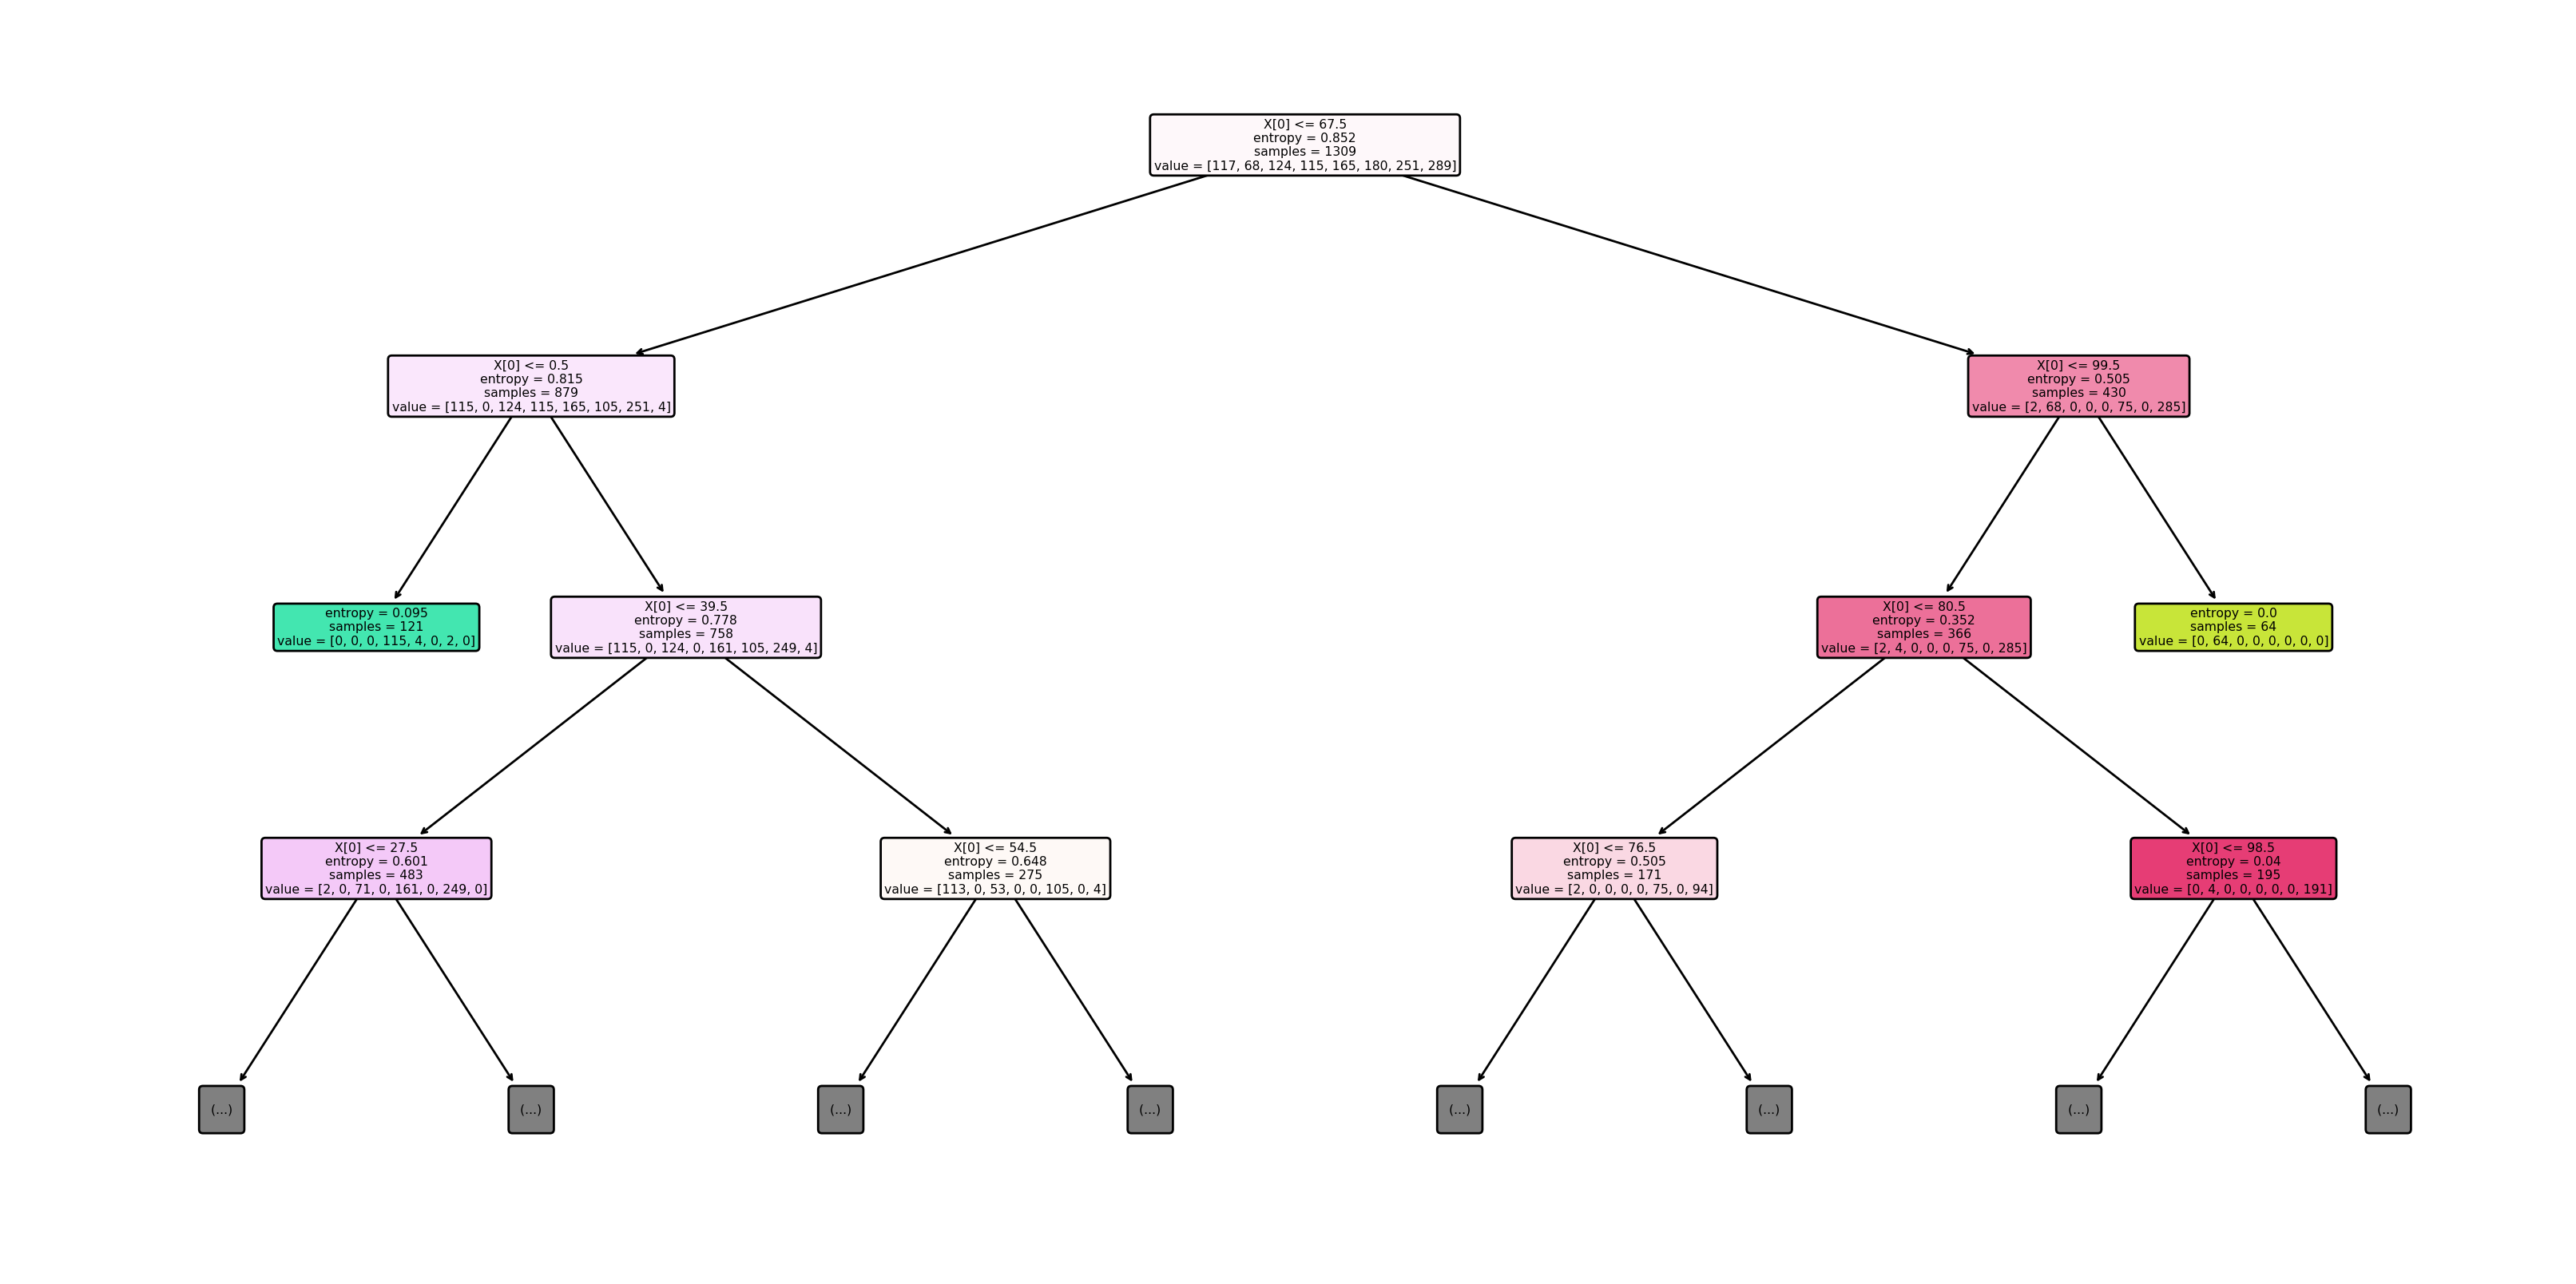

In [33]:
plt.figure(figsize = (20,10), dpi = 200)
plt.savefig.transparent = False
plt.savefig.format = 'png'

tree.plot_tree(clf, max_depth = 3, label='all', 
               filled = True, rounded = True)
plt.savefig('{}_D_Tree_C.png'.format(location))

In [34]:
print("Done")

Done
